# Imports

In [15]:
import numpy as np
from scipy.spatial.distance import cdist

from khan_helpers import Experiment
from khan_helpers.functions import preprocess_text, set_figure_style

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define some helper functions

In [19]:
def jaccard_str(charray_a, charray_b):
    a = set(charray_a.item())
    b = set(charray_b.item())
    return len(a & b) / len(a | b)

In [20]:
def similarity_matrix_text(textlist_a, textlist_b):
    charray_a = np.char.split(textlist_a)[:, None]
    charray_b = np.char.split(textlist_b)[:, None]
    return cdist(charray_a, charray_b, metric=jaccard_str)

# Get topic vectors and raw text for lecture sliding windows & quiz questions

In [4]:
exp = Experiment()

# lecture trajectories
forces_traj = exp.forces_traj
bos_traj = exp.bos_traj

# quiz question topic vectors
forces_qs = exp.get_question_vecs(lectures='forces')
bos_qs = exp.get_question_vecs(lectures='bos')
general_qs = exp.get_question_vecs(lectures='general')

# lecture sliding window text (preprocessed)
forces_windows = exp.forces_windows
bos_windows = exp.bos_windows

# quiz question text (repeat initial preprocessing)
questions_text_raw = exp.questions['question'].to_numpy()
questions_text = np.array(preprocess_text(questions_text_raw))
forces_qs_text = questions_text[exp.questions.query('lecture == 1').index - 1]
bos_qs_text = questions_text[exp.questions.query('lecture == 2').index - 1]
general_qs_text = questions_text[exp.questions.query('lecture == 0').index - 1]

In [7]:
forces_qcorrs = 1 - cdist(forces_traj, forces_qs, 'correlation')
bos_qcorrs = 1 - cdist(bos_traj, bos_qs, 'correlation')

forces_qsim_text = similarity_matrix_text(forces_windows, forces_qs_text)
bos_qsim_text = similarity_matrix_text(bos_windows, bos_qs_text)

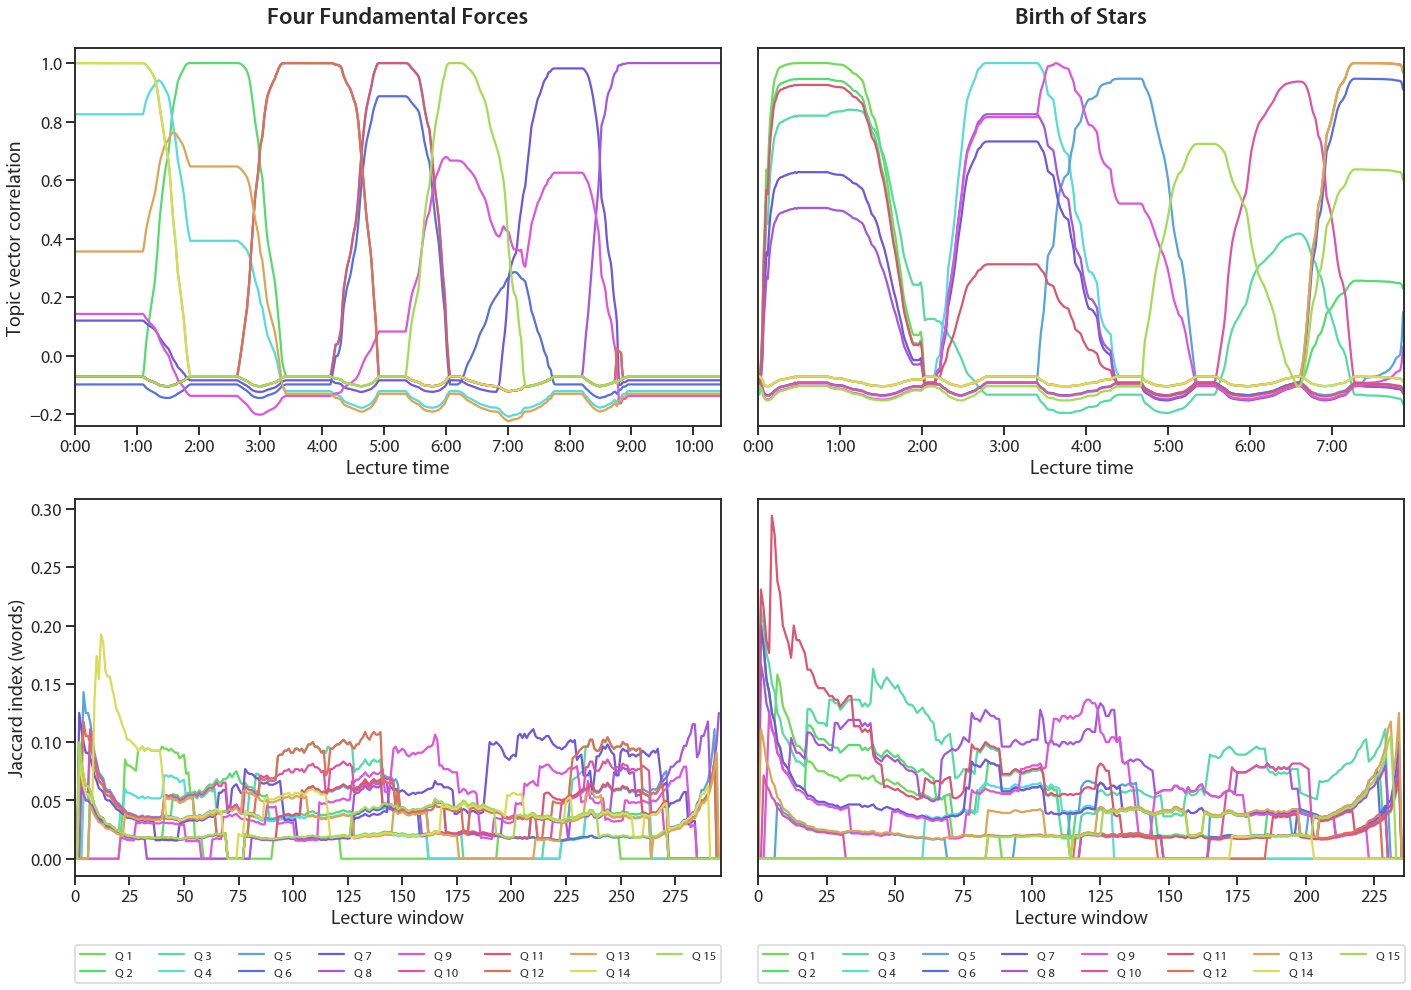

In [28]:
palette = sns.hls_palette(15, h=.3)

with (
    sns.plotting_context('talk', font_scale=1.1), 
    sns.axes_style('ticks'), 
    sns.color_palette(palette)
):
    set_figure_style()
    fig, axarr = plt.subplots(2, 2, sharey='row')
    ((fvax, bvax), 
     (ftax, btax)) = axarr
    fig.set_size_inches(20, 14)
    
    # ==================== Four Fundamental Forces =====================
    # topic vector similarity:
    fvax.plot(forces_qcorrs)
    fvax.set_xlim(0, len(forces_traj))
    fvax.set_ylim(-.24, 1.05)
    fvax.set_xlabel('Lecture time')
    fvax.set_ylabel('Topic vector correlation')
    fvax.set_title('Four Fundamental Forces', 
                   y=1.05, 
                   fontsize='large', 
                   fontweight='semibold')
    fvax.set_xticks(range(0, len(exp.forces_traj), 60), 
                    [f'{i//60}:00' for i in range(0, len(exp.forces_traj), 60)])
#     fvax.grid(False)

    # word overlap similarity:
    ftax.plot(forces_qsim_text)
    ftax.set_xlim(0, len(forces_windows))
    ftax.set_xticks(range(0, len(forces_windows)+1, 25))
#     ftax.set_ylim(-.24, 1.05)
    ftax.set_xlabel('Lecture window')
    ftax.set_ylabel('Jaccard index (words)')
    ftax.legend(labels=[f'Q {i}' for i in range(1, 16)], 
                fontsize=12.5, 
                loc=3, 
                ncol=8, 
                mode='expand',
                bbox_to_anchor=(-0.01, -.3, 1.02, 1))
    
    # ========================= Birth of Stars =========================
    bvax.plot(bos_qcorrs)
    bvax.set_xlim(0, len(bos_traj))
#     bvax.set_ylim(-.24, 1.05)
    bvax.set_xlabel('Lecture time')
    bvax.set_title('Birth of Stars', 
                   y=1.05, 
                   fontsize='large', 
                   fontweight='semibold')
    bvax.tick_params(axis='y', length=0)
    bvax.set_xticks(range(0, len(exp.bos_traj), 60),
                    [f'{i//60}:00' for i in range(0, len(exp.bos_traj), 60)])
#     fvax.grid(False)

    # word overlap similarity:
    btax.plot(bos_qsim_text)
    btax.set_xlim(0, len(bos_windows))
    btax.set_xticks(range(0, len(bos_windows)+1, 25))
#     btax.set_ylim(-.24, 1.05)
    btax.set_xlabel('Lecture window')
    btax.tick_params(axis='y', length=0)
    btax.legend(labels=[f'Q {i}' for i in range(1, 16)], 
                fontsize=12.5, 
                loc=3, 
                ncol=8, 
                mode='expand',
                bbox_to_anchor=(-0.01, -.3, 1.02, 1))
    
#     plt.subplots_adjust(wspace=-1)
    plt.tight_layout()
    plt.show()
    

In [29]:
import pandas as pd

In [33]:
pd.DataFrame(forces_qcorrs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.071429,-0.071429,0.824900,-0.071429,-0.098816,0.119487,-0.071429,0.142314,-0.071429,-0.071429,-0.071429,0.355745,1.000000,-0.071429
1,1.000000,-0.071429,-0.071429,0.824900,-0.071429,-0.098816,0.119487,-0.071429,0.142314,-0.071429,-0.071429,-0.071429,0.355745,1.000000,-0.071429
2,1.000000,-0.071429,-0.071429,0.824900,-0.071429,-0.098816,0.119487,-0.071429,0.142314,-0.071429,-0.071429,-0.071429,0.355745,1.000000,-0.071429
3,1.000000,-0.071429,-0.071429,0.824900,-0.071429,-0.098816,0.119487,-0.071429,0.142314,-0.071429,-0.071429,-0.071429,0.355745,1.000000,-0.071429
4,1.000000,-0.071429,-0.071429,0.824900,-0.071429,-0.098816,0.119487,-0.071429,0.142314,-0.071429,-0.071429,-0.071429,0.355745,1.000000,-0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,-0.071429,-0.071429,-0.071429,-0.121721,-0.071429,-0.098816,-0.084712,1.000000,-0.137853,-0.071429,-0.071429,-0.071429,-0.130783,-0.071429,-0.071429
623,-0.071429,-0.071429,-0.071429,-0.121721,-0.071429,-0.098816,-0.084712,1.000000,-0.137853,-0.071429,-0.071429,-0.071429,-0.130783,-0.071429,-0.071429
624,-0.071429,-0.071429,-0.071429,-0.121721,-0.071429,-0.098816,-0.084712,1.000000,-0.137853,-0.071429,-0.071429,-0.071429,-0.130783,-0.071429,-0.071429
625,-0.071429,-0.071429,-0.071429,-0.121721,-0.071429,-0.098816,-0.084712,1.000000,-0.137853,-0.071429,-0.071429,-0.071429,-0.130783,-0.071429,-0.071429


In [155]:
forces_qcorrs_df = pd.DataFrame(forces_qcorrs, columns=range(1, 16)).melt(
    var_name='Question', value_name='Similarity'
)
forces_qcorrs_df[['Similarity metric', 'lecture']] = [
    'Topic vector correlation', 'Four Fundamental Forces'
]
bos_qcorrs_df = pd.DataFrame(bos_qcorrs, columns=range(16, 31)).melt(
    var_name='Question', value_name='Similarity'
)
bos_qcorrs_df[['Similarity metric', 'lecture']] = [
    'Topic vector correlation', 'Birth of Stars'
]
forces_qsim_text_df = pd.DataFrame(forces_qsim_text, columns=range(1, 16)).melt(
    var_name='Question', value_name='Similarity'
)
forces_qsim_text_df[['Similarity metric', 'lecture']] = [
    'Jaccard index (words)', 'Four Fundamental Forces'
]
bos_qsim_text_df = pd.DataFrame(bos_qsim_text, columns=range(16, 31)).melt(
    var_name='Question', value_name='Similarity'
)
bos_qsim_text_df[['Similarity metric', 'lecture']] = [
    'Jaccard index (words)', 'Birth of Stars'
]
similarity_df = pd.concat((forces_qcorrs_df, 
                           bos_qcorrs_df, 
                           forces_qsim_text_df, 
                           bos_qsim_text_df), ignore_index=True)
similarity_df

,Question,Similarity,Similarity metric,lecture
0,1,1.000000,Topic vector correlation,Four Fundamental Forces
1,1,1.000000,Topic vector correlation,Four Fundamental Forces
2,1,1.000000,Topic vector correlation,Four Fundamental Forces
3,1,1.000000,Topic vector correlation,Four Fundamental Forces
4,1,1.000000,Topic vector correlation,Four Fundamental Forces
...,...,...,...,...
24475,30,0.105263,Jaccard index (words),Birth of Stars
24476,30,0.062500,Jaccard index (words),Birth of Stars
24477,30,0.000000,Jaccard index (words),Birth of Stars
24478,30,0.000000,Jaccard index (words),Birth of Stars


In [165]:
similarity_df['Similarity (normalized)'] = (
    similarity_df
    .groupby(['lecture', 'Similarity metric', 'Question'])['Similarity']
    .transform(lambda x: (x - x.min()) / (x.max() - x.min()))
)

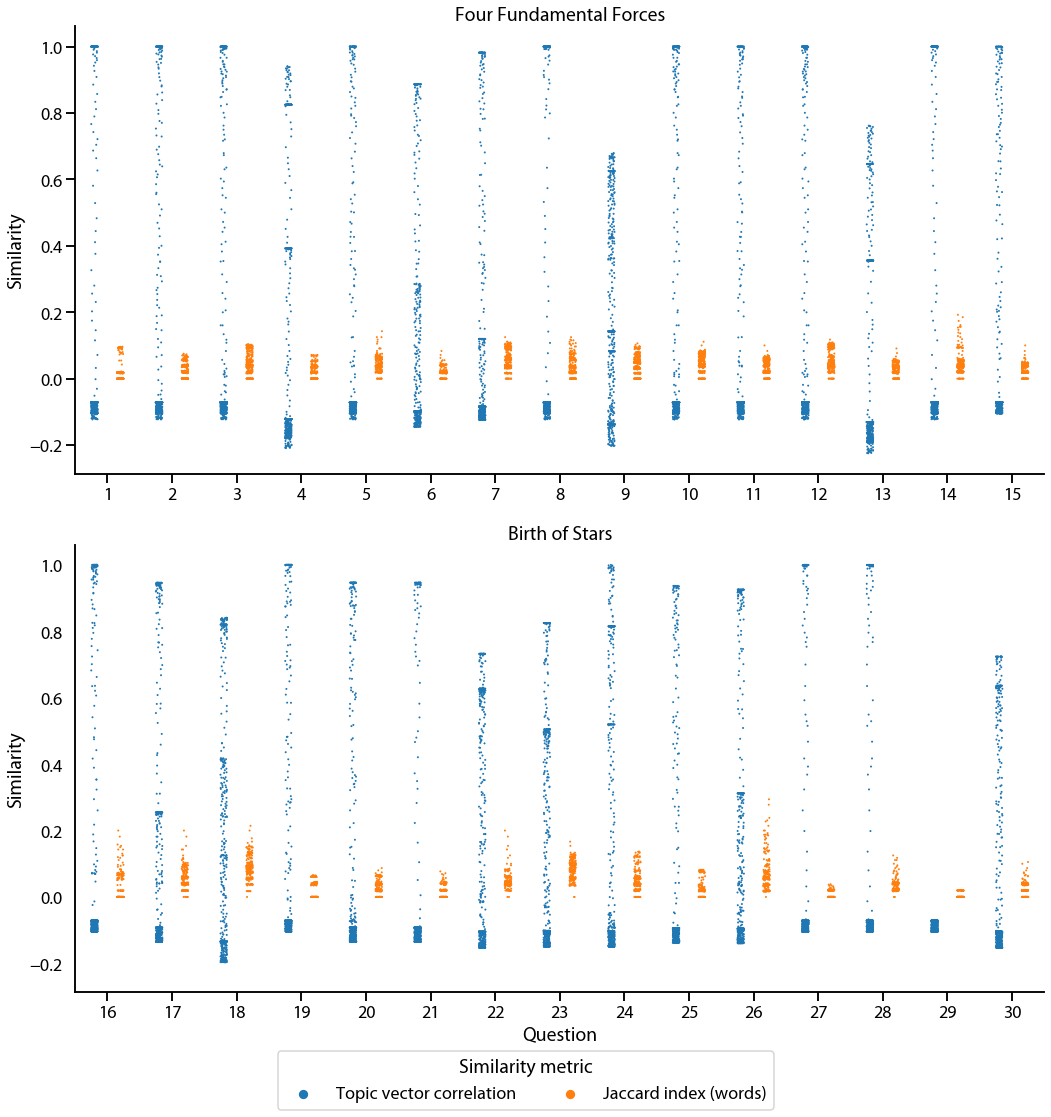

In [154]:
with sns.plotting_context('talk', font_scale=1.1):
    g = sns.catplot(data=similarity_df, 
                    kind='strip',
                    x='Question',
                    y='Similarity',
                    hue='Similarity metric',
                    row='lecture',
                    dodge='true', 
                    s=2,
                    sharex=False)
    g.set_titles('{row_name}')
    g.fig.set_size_inches(15, 15)
    sns.move_legend(g, 'lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=True)
    fax, bax = g.axes
    bax[0].tick_params(left=False)
    # fax.set_xlim(-0.5, 15.5)
    # bax.set_xlim(14.5, 31.5)
    plt.tight_layout()
    plt.show()

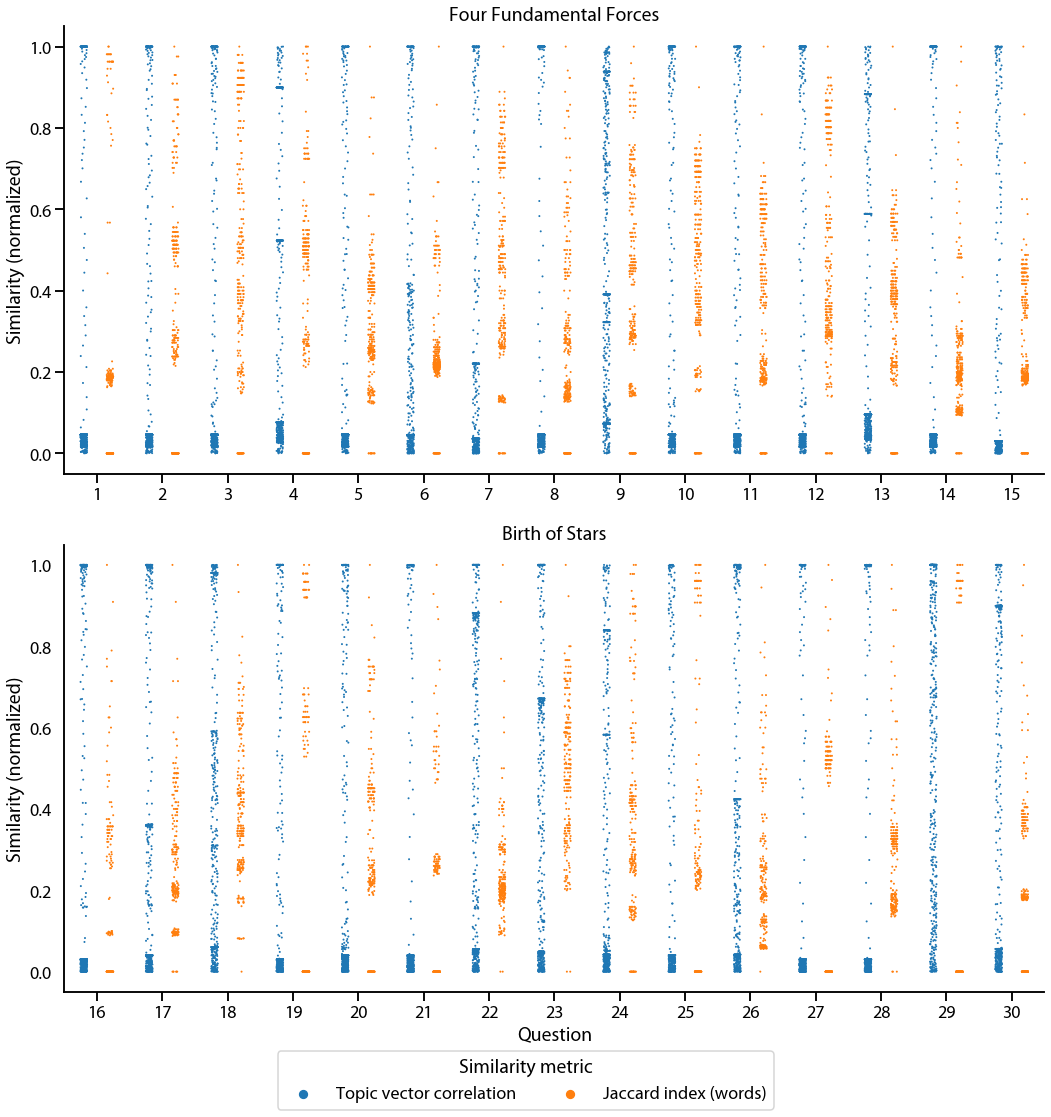

In [168]:
with sns.plotting_context('talk', font_scale=1.1):
    g = sns.catplot(data=similarity_df, 
                    kind='strip',
                    x='Question',
                    y='Similarity (normalized)',
                    hue='Similarity metric',
                    row='lecture',
                    dodge='true', 
                    s=2,
                    sharex=False)
    g.set_titles('{row_name}')
    g.fig.set_size_inches(15, 15)
    sns.move_legend(g, 'lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=True)
    fax, bax = g.axes
    bax[0].tick_params(left=False)
    # fax.set_xlim(-0.5, 15.5)
    # bax.set_xlim(14.5, 31.5)
    plt.tight_layout()
    plt.show()

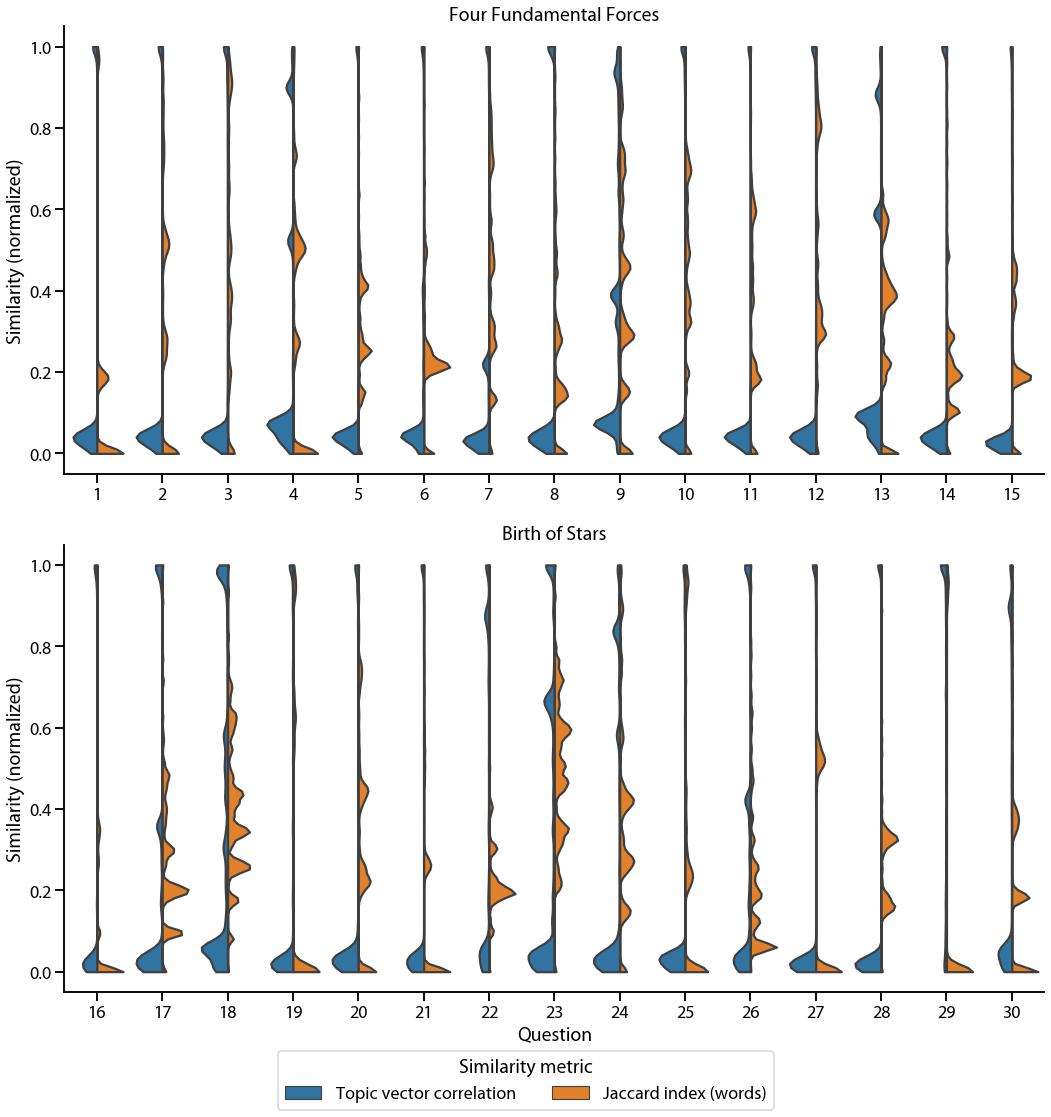

In [178]:
with sns.plotting_context('talk', font_scale=1.1):
    g = sns.catplot(data=similarity_df, 
                    kind='violin',
                    x='Question',
                    y='Similarity (normalized)',
                    hue='Similarity metric',
                    row='lecture',
                    split=True,
                    inner=None,
                    cut=0,
#                     s=2,
                    sharex=False)
    g.set_titles('{row_name}')
    g.fig.set_size_inches(15, 15)
    sns.move_legend(g, 'lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=True)
    fax, bax = g.axes
#     bax[0].tick_params(left=False)
    # fax.set_xlim(-0.5, 15.5)
    # bax.set_xlim(14.5, 31.5)
    plt.tight_layout()
    plt.show()

In [ ]:
forces_qcorrs = 1 - cdist(forces_traj, forces_qs, 'correlation')
bos_qcorrs = 1 - cdist(bos_traj, bos_qs, 'correlation')

forces_qsim_text = similarity_matrix_text(forces_windows, forces_qs_text)
bos_qsim_text = similarity_matrix_text(bos_windows, bos_qs_text)

In [220]:
# forces_allqs_corrs = 1 - cdist(forces_traj, exp.question_vectors[:30], 'correlation')
# bos_allqs_corrs = 1 - cdist(bos_traj, exp.question_vectors[:30], 'correlation')

# forces_allqs_text_sim = similarity_matrix_text(
#     forces_windows, np.concatenate((forces_qs_text, bos_qs_text))
# )
# bos_allqs_text_sim = similarity_matrix_text(
#     bos_windows, np.concatenate((forces_qs_text, bos_qs_text))
# )

# # lecture1 tpts x lecture1 qs corrmat, lecture1 tpts x lecture2 qs corrmat
# forces_fqs_corrs, forces_bqs_corrs = np.split(forces_allqs_corrs, 2, axis=1)
# # lecture2 tpts x lecture1 qs corrmat, lecture2 tpts x lecture2 qs corrmat
# bos_fqs_corrs, bos_bqs_corrs = np.split(bos_allqs_corrs, 2, axis=1)

# # lecture1 windows x lecture1 qs simmat, lecture1 windows x lecture2 qs simmat
# forces_fqs_text_sim, forces_bqs_text_sim = np.split(forces_allqs_text_sim, 2, axis=1)
# # lecture2 windows x lecture1 qs simmat, lecture2 windows x lecture2 qs simmat
# bos_fqs_text_sim, bos_bqs_text_sim = np.split(bos_allqs_text_sim, 2, axis=1)

In [333]:
forces_allqs_corrs = 1 - cdist(forces_traj, exp.question_vectors[:30], 'correlation')
bos_allqs_corrs = 1 - cdist(bos_traj, exp.question_vectors[:30], 'correlation')

forces_allqs_text_sim = similarity_matrix_text(
    forces_windows, np.concatenate((forces_qs_text, bos_qs_text))
)
bos_allqs_text_sim = similarity_matrix_text(
    bos_windows, np.concatenate((forces_qs_text, bos_qs_text))
)

# (inv z-transformed) average (z-transformed) correlation with lecture1 
# tpts for each lecture1 & lecture2 question
forces_allqs_meancorrs = corr_mean(forces_allqs_corrs, axis=0)
# (inv z-transformed) average (z-transformed) correlation with lecture2 
# tpts for each lecture1 & lecture2 question
bos_allqs_meancorrs = corr_mean(bos_allqs_corrs, axis=0)

# avg similarity to lecture1 windows for each lecture1 & lecture2 question
forces_allqs_text_meansims = forces_allqs_text_sim.mean(axis=0)
# avg similarity to lecture2 windows for each lecture1 & lecture2 question
bos_allqs_text_meansims = bos_allqs_text_sim.mean(axis=0)

In [338]:
allqs_meancorrs_df = pd.DataFrame(
    [
        range(1, 31), 
        ['Lecture 1 questions']*15 + ['Lecture 2 questions']*15,
        forces_allqs_meancorrs, 
        bos_allqs_meancorrs, 
        ['Topic vector correlation']*30,
    ],
    index=[
        'Question', 
        'Reference lecture',
        'Similarity to lecture 1', 
        'Similarity to lecture 2', 
        'Similarity metric'
    ]
).T
allqs_text_meansims_df = pd.DataFrame(
    [
        range(1, 31), 
        ['Lecture 1 questions']*15 + ['Lecture 2 questions']*15,
        forces_allqs_text_meansims, 
        forces_allqs_text_meansims, 
        ['Jaccard index (words)']*30
    ],
    index=[
        'Question', 
        'Reference lecture',
        'Similarity to lecture 1', 
        'Similarity to lecture 2', 
        'Similarity metric'
    ]
).T

mean_similarity_df = pd.concat((allqs_meancorrs_df, allqs_text_meansims_df), ignore_index=True)
mean_similarity_df

,Question,Reference lecture,Similarity to lecture 1,Similarity to lecture 2,Similarity metric
0,1,Lecture 1 questions,0.95871,-0.086216,Topic vector correlation
1,2,Lecture 1 questions,0.884221,-0.086216,Topic vector correlation
2,3,Lecture 1 questions,0.885752,-0.086216,Topic vector correlation
3,4,Lecture 1 questions,0.156721,-0.098578,Topic vector correlation
4,5,Lecture 1 questions,0.65945,-0.086216,Topic vector correlation
5,6,Lecture 1 questions,0.095515,-0.038082,Topic vector correlation
6,7,Lecture 1 questions,0.186033,0.161828,Topic vector correlation
7,8,Lecture 1 questions,0.986753,-0.086216,Topic vector correlation
8,9,Lecture 1 questions,0.138946,-0.040383,Topic vector correlation
9,10,Lecture 1 questions,0.872782,-0.086216,Topic vector correlation


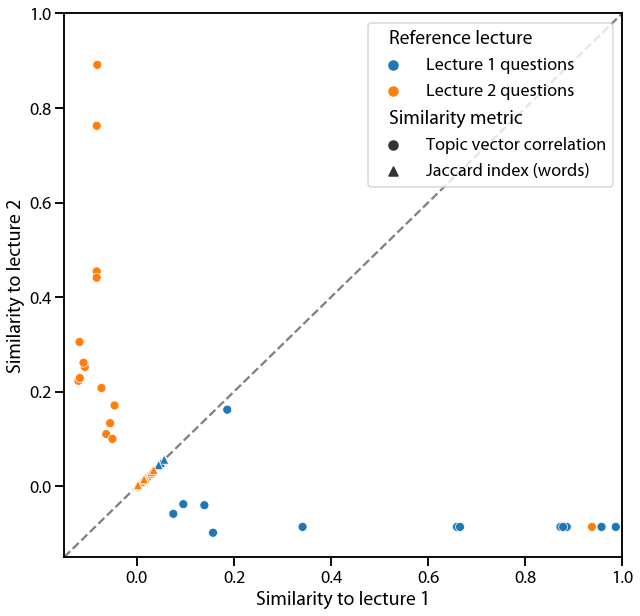

In [377]:
with sns.plotting_context('talk', font_scale=1.1):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    sns.scatterplot(data=mean_similarity_df,
                    x='Similarity to lecture 1',
                    y='Similarity to lecture 2',
                    hue='Reference lecture',
                    style='Similarity metric',
                    markers=['o', '^'],
                    ax=ax)
    ax.set_xlim(-0.15, 1)
    ax.set_ylim(-0.15, 1)
    ax.plot([-0.15, 1], [-0.15, 1], color='grey', linestyle='--', zorder=0)
    ax.legend_._legend_box.align = "left"
#     sns.move_legend(ax, 'center right')
    ax.get_legend()._legend_box.align = "left"

corr_mean(forces_qcorrs[:, 0]) = 0.9587099961245483
np.mean(forces_qcorrs[:, 0]) = 0.0815576158466554


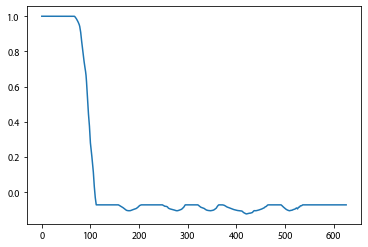

In [382]:
plt.plot(forces_qcorrs[:, 0])
print(f'{corr_mean(forces_qcorrs[:, 0]) = }')
print(f'{np.mean(forces_qcorrs[:, 0]) = }')

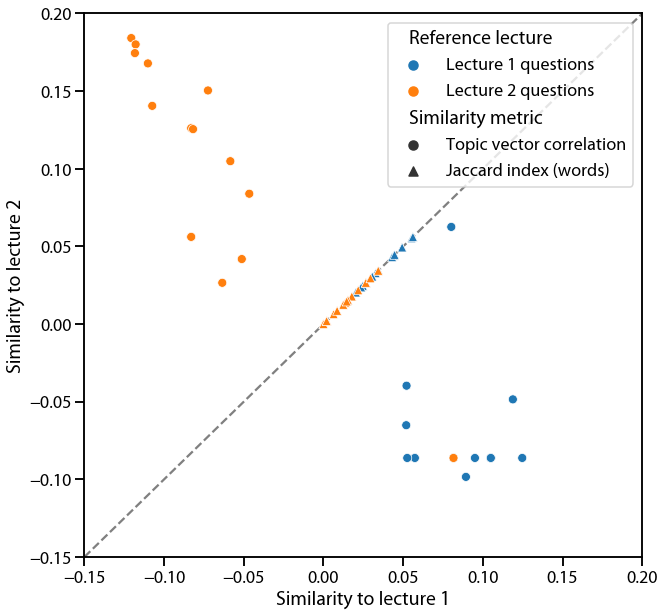

In [390]:
forces_allqs_meancorrs_notransform = np.mean(forces_allqs_corrs, axis=0)
bos_allqs_meancorrs_notransform = np.mean(bos_allqs_corrs, axis=0)

allqs_meancorrs_df_notransform = pd.DataFrame(
    [
        range(1, 31), 
        ['Lecture 1 questions']*15 + ['Lecture 2 questions']*15,
        forces_allqs_meancorrs_notransform, 
        bos_allqs_meancorrs_notransform, 
        ['Topic vector correlation']*30,
    ],
    index=[
        'Question', 
        'Reference lecture',
        'Similarity to lecture 1', 
        'Similarity to lecture 2', 
        'Similarity metric'
    ]
).T
allqs_text_meansims_df_notransform = pd.DataFrame(
    [
        range(1, 31), 
        ['Lecture 1 questions']*15 + ['Lecture 2 questions']*15,
        forces_allqs_text_meansims, 
        forces_allqs_text_meansims, 
        ['Jaccard index (words)']*30
    ],
    index=[
        'Question', 
        'Reference lecture',
        'Similarity to lecture 1', 
        'Similarity to lecture 2', 
        'Similarity metric'
    ]
).T

mean_similarity_df_notransform = pd.concat((allqs_meancorrs_df_notransform, 
                                            allqs_text_meansims_df_notransform), ignore_index=True)

with sns.plotting_context('talk', font_scale=1.1):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    sns.scatterplot(data=mean_similarity_df_notransform,
                    x='Similarity to lecture 1',
                    y='Similarity to lecture 2',
                    hue='Reference lecture',
                    style='Similarity metric',
                    markers=['o', '^'],
                    ax=ax)
    ax.set_xlim(-0.15, 0.2)
    ax.set_ylim(-0.15, 0.2)
    ax.plot([-0.15, 0.2], [-0.15, 0.2], color='grey', linestyle='--', zorder=0)
    ax.legend_._legend_box.align = "left"
#     sns.move_legend(ax, 'center right')
    ax.get_legend()._legend_box.align = "left"

In [388]:
ax.get_xlim()

(-0.13281073463736642, 0.13693247031438904)

In [224]:
forces_allqs_corrs_df = pd.DataFrame(forces_allqs_corrs, columns=range(1, 31)).melt(
    var_name='Question', value_name='Similarity to lecture 1'
)
forces_allqs_corrs_df['Similarity metric'] = 'Topic vector correlation'

bos_allqs_corrs_df = pd.DataFrame(bos_allqs_corrs, columns=range(1, 31)).melt(
    var_name='Question', value_name='Similarity to lecture 2'
)
bos_allqs_corrs_df['Similarity metric'] = 'Topic vector correlation'



forces_allqs_text_sim_df = pd.DataFrame(forces_allqs_text_sim, columns=range(1, 31)).melt(
    var_name='Question', value_name='Similarity to lecture 1'
)
forces_allqs_text_sim_df['Similarity metric'] = 'Jaccard index (words)'

bos_allqs_text_sim_df = pd.DataFrame(bos_allqs_text_sim, columns=range(1, 31)).melt(
    var_name='Question', value_name='Similarity to lecture 2'
)
bos_allqs_text_sim_df['Similarity metric'] = 'Jaccard index (words)'

forces_allqs_similarity_df = pd.concat(
    (forces_allqs_corrs_df, forces_allqs_text_sim_df), ignore_index=True
)

Why is the gravitational attraction between you and your computer too small for you to notice?


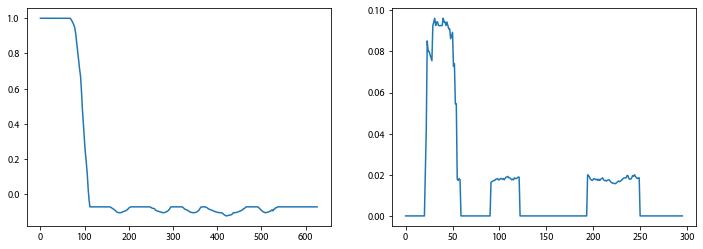

Which of the following is an example of the Weak Interaction?


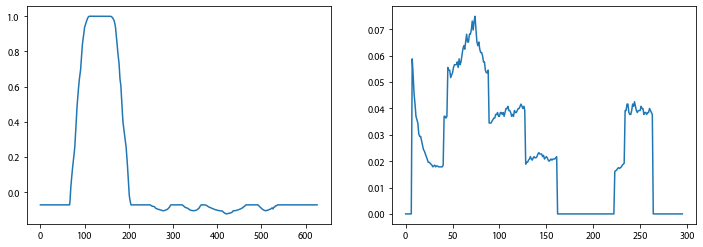

Roughly how many times stronger is the Weak Interaction than gravity?


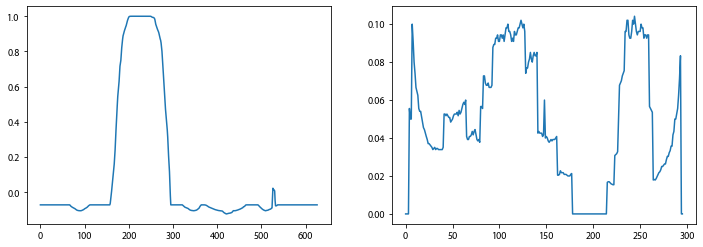

Why don't you and your computer experience any attraction or repulsion due to the Weak Interaction?


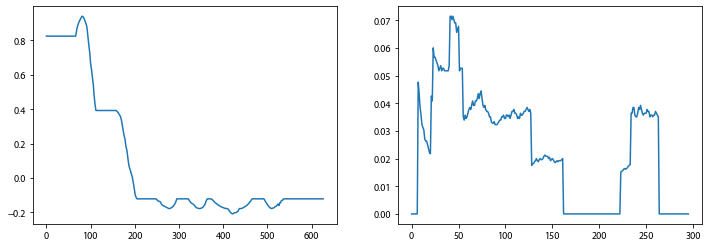

Which of the following is a difference between gravity and the electromagnetic force?


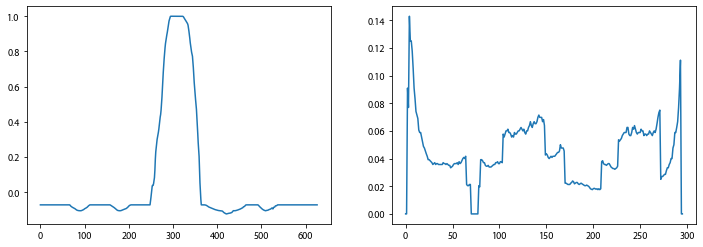

Electricity and magnetism can be shown to be two cases of the same force if we:


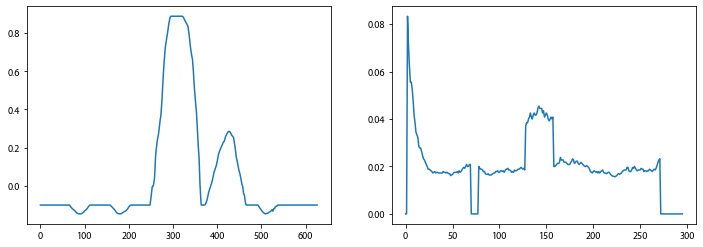

Which of the following are the primary two fundamental forces acting in opposition between the positively-charged protons in an atom's nucleus?


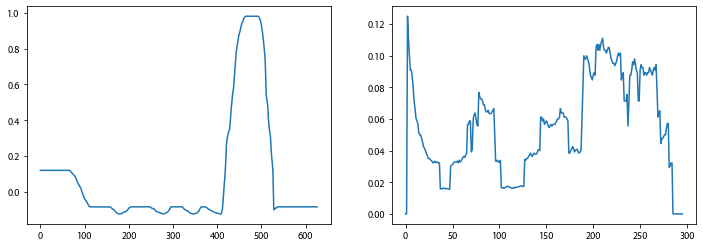

Why does the universe have a very uneven distribution of mass but a relatively equal distribution of charge?


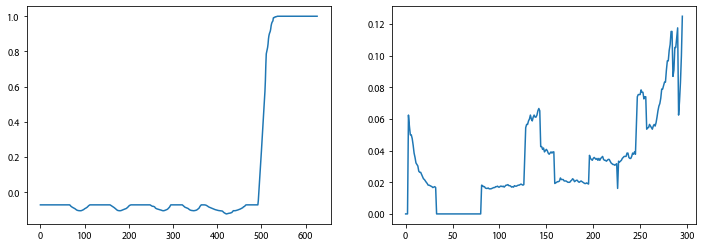

In your body, there are a tremendous amount of negatively-charged electrons. Your computer also contains a huge number of negatively-charged electrons. We know that like charges repel, but you and your computer are not repelled apart. Which of the following explains why?


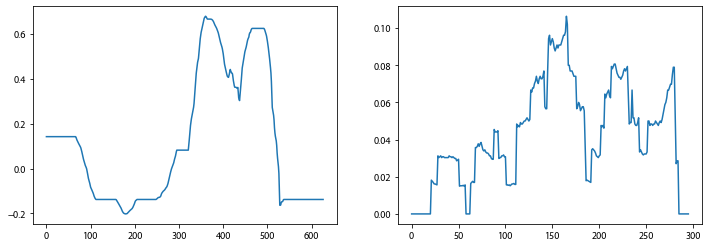

Which of the following is a similarity between the Weak Interaction and the Strong Force?


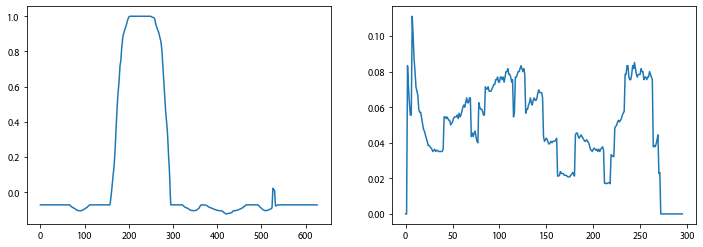

Which force is stronger than the Electromagnetic Force?


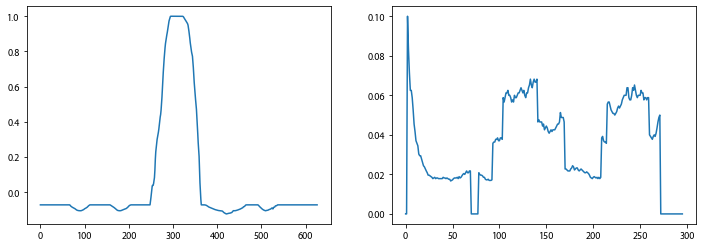

Roughly how many times stronger is the Strong Force than gravity?


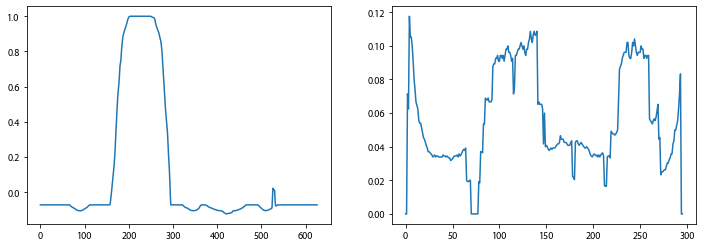

Which of the following would have to be true for the Weak Interaction to cause repulsion or attraction between two objects?


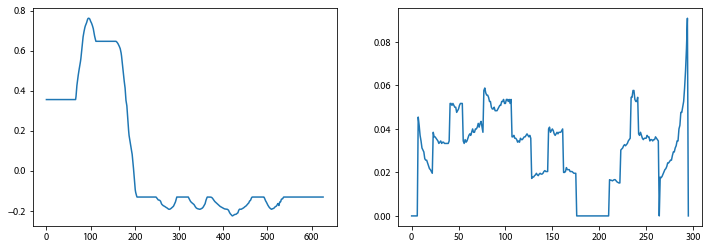

Which force keeps us from jumping off of Earth?


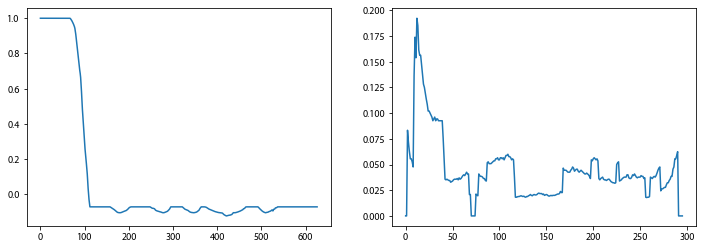

What does the Coulomb Force refer to?


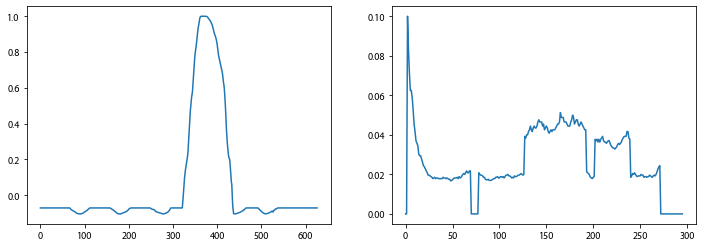

In [400]:
for i in range(15):
    print(exp.questions['question'].to_numpy()[i])
    fig, (corr_ax, text_sim_ax) = plt.subplots(1, 2, figsize=(12, 4))
    corr_ax.plot(forces_qcorrs[:, i])
    text_sim_ax.plot(forces_qsim_text[:, i])
    plt.show()